## DTWDoc2vec: TFIDF Weighted Doc2vec (Delta form)

In [1]:
import numpy as np

In [2]:
corpus = []
# 读入数据集
with open('sixTypes-GeneratedComments.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        corpus.append(line.strip('\n'))

In [3]:
corpus[:10]

['LN7 LN6 CP6 LN10 LN8 CP3 LN8 CP6 LN4 LN3 CN5 CP5 CP4 CP5 CP3 LN12 CP6 LN9 LN7 LN10 LN8 LN3 CP4 LN8 CP4',
 'CP5 LN4 LN2 CP4 CP5 LN11 LN8 CP2 CP4 LN9 CP3 OP3 CP6 LN5 LN4 CP1',
 'LN9 LN12 CP1 CP3 LN1 CP1 LN5 CP5 CP2 CP2 LN9 LN5 CP1 CP5 LN12 CN1 CP3 CN2 CP5 LN2',
 'LN7 CP1 LN12 CP6 LN9 CP2 CP3 CP6 LN2 CP6 CP1 CP5 LN8 CP4 LN2 CP4 LN6 CP1',
 'LN4 ON6 ON3 LN8 LN1 LN7',
 'CP4 ON1 LN2 LN2 LN12 CP6 LN8 LN8 CP1 OP2 CP5 LN3 CN2 CP6 LN10 OP1 CN4 OP5 CP1 CP4 CP2',
 'LN10 CP4 CP1 CP1 OP4 LN3 CP3 LN8 CP4',
 'CP2 LN12 CP2 CP5 CP1 CP1 LN11 CP1 LN5 CP3 LN9 LN12 LN7 LN1 CP1 LN12',
 'LN11 LN9 CP1 LN4 LN1 CP6 LN12 CN2 LN10 CP3 CN5 LN2 CP2 LN8 LN11 CP1 ON6 CP4 OP4 CP3 CP4 CP1',
 'LN9 OP5 LN12 LN10 LN2 LN8 LN10 ON3 LN3 CP6 CP4 LN2 CP4 CP5']

In [4]:
# 预处理
# 去除所有 没有评论的数据
while '' in corpus:
    corpus.remove('')
print('Size of Corpus:', len(corpus))

Size of Corpus: 1200


In [5]:
# 由于 word2vec 要求数据有 lists of list 的形式
corpus_lists = []
for i in corpus:
    corpus_lists.append(i.split(' '))
print(corpus_lists[:10])

[['LN7', 'LN6', 'CP6', 'LN10', 'LN8', 'CP3', 'LN8', 'CP6', 'LN4', 'LN3', 'CN5', 'CP5', 'CP4', 'CP5', 'CP3', 'LN12', 'CP6', 'LN9', 'LN7', 'LN10', 'LN8', 'LN3', 'CP4', 'LN8', 'CP4'], ['CP5', 'LN4', 'LN2', 'CP4', 'CP5', 'LN11', 'LN8', 'CP2', 'CP4', 'LN9', 'CP3', 'OP3', 'CP6', 'LN5', 'LN4', 'CP1'], ['LN9', 'LN12', 'CP1', 'CP3', 'LN1', 'CP1', 'LN5', 'CP5', 'CP2', 'CP2', 'LN9', 'LN5', 'CP1', 'CP5', 'LN12', 'CN1', 'CP3', 'CN2', 'CP5', 'LN2'], ['LN7', 'CP1', 'LN12', 'CP6', 'LN9', 'CP2', 'CP3', 'CP6', 'LN2', 'CP6', 'CP1', 'CP5', 'LN8', 'CP4', 'LN2', 'CP4', 'LN6', 'CP1'], ['LN4', 'ON6', 'ON3', 'LN8', 'LN1', 'LN7'], ['CP4', 'ON1', 'LN2', 'LN2', 'LN12', 'CP6', 'LN8', 'LN8', 'CP1', 'OP2', 'CP5', 'LN3', 'CN2', 'CP6', 'LN10', 'OP1', 'CN4', 'OP5', 'CP1', 'CP4', 'CP2'], ['LN10', 'CP4', 'CP1', 'CP1', 'OP4', 'LN3', 'CP3', 'LN8', 'CP4'], ['CP2', 'LN12', 'CP2', 'CP5', 'CP1', 'CP1', 'LN11', 'CP1', 'LN5', 'CP3', 'LN9', 'LN12', 'LN7', 'LN1', 'CP1', 'LN12'], ['LN11', 'LN9', 'CP1', 'LN4', 'LN1', 'CP6', 'LN12', 

In [6]:
# 统计所有出现过的 Comments
comments = []
for current_essay in corpus_lists:
    for current_comment in current_essay:
        comments.append(current_comment)

comments = list(set(comments))
comments

['LN8',
 'LN1',
 'OP1',
 'CN6',
 'LN10',
 'LP10',
 'CP4',
 'LN2',
 'CP6',
 'ON6',
 'LP4',
 'LN7',
 'OP2',
 'OP3',
 'CP3',
 'LP6',
 'LP8',
 'ON3',
 'LP1',
 'CN4',
 'ON4',
 'LN3',
 'CP2',
 'LN11',
 'ON5',
 'LP11',
 'LN12',
 'CP1',
 'LP2',
 'LP5',
 'ON1',
 'OP5',
 'CN3',
 'LN6',
 'OP4',
 'ON2',
 'LP12',
 'LP3',
 'LN4',
 'LN5',
 'LN9',
 'CN1',
 'OP6',
 'LP7',
 'CP5',
 'CN2',
 'LP9',
 'CN5']

In [7]:
import pickle
# 导入训练后的 word2vec 模型
vectorizer_w2v = pickle.load(open('model/vectorized_generated_corpus_model_word2vec.pkl', 'rb'))

In [8]:
# 输出 LN11 的 vector
vectorizer_w2v.wv.get_vector('LN11')

array([ 0.02100625,  0.01671943,  0.16197883,  0.07611066,  0.04013322,
       -0.12441151,  0.11054646,  0.29845616, -0.17251268, -0.23342088,
        0.03933578, -0.15620671,  0.10006741,  0.09841397,  0.04652986,
       -0.04808835,  0.22958212,  0.02195791, -0.08397482, -0.32210597,
        0.04571006, -0.05388854,  0.12604113, -0.04023429, -0.03878737,
        0.09433573, -0.1513696 ,  0.10484445,  0.0136544 ,  0.08349381,
        0.2270599 , -0.05738252, -0.00551795, -0.17930438,  0.01653195,
       -0.01386009,  0.06533034, -0.05652786, -0.01296879, -0.0854741 ,
        0.0546761 , -0.15087454,  0.02021481,  0.08830004,  0.06367197,
       -0.10993783, -0.09402345, -0.10449123,  0.05899634,  0.05319189,
        0.09168042, -0.05079487, -0.07571499, -0.07774744, -0.04142652,
       -0.00777629,  0.01364443,  0.02327345,  0.05497254,  0.07611269,
       -0.0684389 , -0.00559475,  0.20862034,  0.16747329, -0.13617499,
        0.2261948 ,  0.03588866,  0.17465422, -0.13979976,  0.04

In [9]:
# 寻找 10 个与 LN11 最相似的 vectors
vectorizer_w2v.wv.most_similar('LN11')[:10]

[('LN4', 0.9975280165672302),
 ('LN2', 0.9972217679023743),
 ('LN10', 0.9971293807029724),
 ('LN3', 0.9968485236167908),
 ('LN1', 0.9967853426933289),
 ('LN9', 0.9967197179794312),
 ('LN5', 0.9967027306556702),
 ('LN12', 0.996675968170166),
 ('LN6', 0.9966257214546204),
 ('LN8', 0.9964402318000793)]

In [10]:
all_vectors = []
for current_comment in comments:
    all_vectors.append(vectorizer_w2v.wv.get_vector(current_comment))

all_vectors

[array([ 0.01825753,  0.01496295,  0.15372458,  0.09116775,  0.0281228 ,
        -0.12552656,  0.11087274,  0.30277032, -0.16708525, -0.22474542,
         0.04512887, -0.15023214,  0.09016602,  0.11148398,  0.03975716,
        -0.04724578,  0.21686666,  0.01817184, -0.08348773, -0.31246406,
         0.05744288, -0.05502947,  0.12448277, -0.02158836, -0.02187564,
         0.07627676, -0.14128116,  0.10468849,  0.01276733,  0.07563796,
         0.22459742, -0.06425335,  0.00540586, -0.17602512,  0.01738517,
        -0.01663879,  0.07826497, -0.05340239,  0.00077437, -0.08665303,
         0.03326132, -0.14152049,  0.00715779,  0.07811493,  0.0565805 ,
        -0.09604187, -0.09512089, -0.08562624,  0.05513436,  0.06213903,
         0.08413808, -0.04308901, -0.08797538, -0.06925923, -0.0259952 ,
        -0.01550623,  0.02227939,  0.0095293 ,  0.04793998,  0.08009397,
        -0.08111187, -0.0022045 ,  0.2031357 ,  0.13961571, -0.14349444,
         0.21245024,  0.04556074,  0.16312078, -0.1

In [11]:
from sklearn.manifold import TSNE
# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(all_vectors)

C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


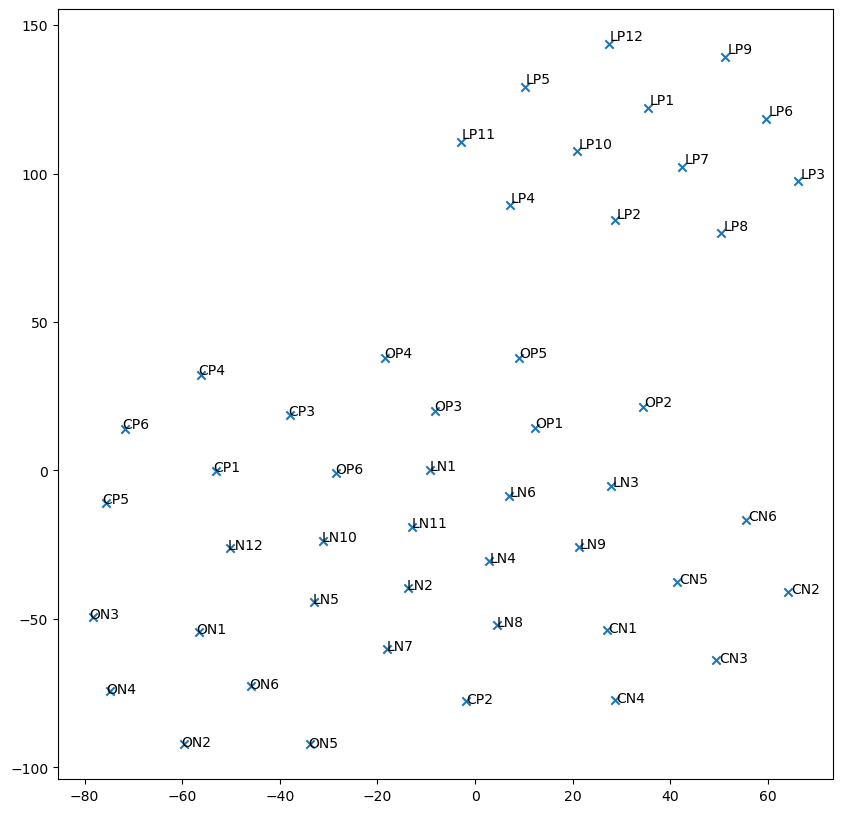

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(decomposition_data[:, 0], decomposition_data[:, 1], marker='x')
for i in range(len(decomposition_data)):
    plt.text(decomposition_data[:, 0][i] * 1.01, decomposition_data[:, 1][i] * 1.01, comments[i], fontsize=10)
plt.show()

In [13]:
from pprint import pprint

# 寻找与目标文章（利用 comments 序列标记）相似的文章
target_essay = 'CN4 CN1 CN6 CP2 ON1 LN1 OP1 ON3 LN5 LN1 LN12 ON3 CP2 LN6 LN9 LN11 ON3 LN11 LN8 OP2 CP4'

# 构造 target_essay 与所有 essays 之间的相似度矩阵 essays_similarity（利用 n_similarity）
essays_similarity = np.zeros(len(corpus))
target_essay_comments = [w for w in target_essay.split()]
for index, essay in enumerate(corpus):
    current_essay_comments = [w for w in essay.split()]
    sim = vectorizer_w2v.wv.n_similarity(target_essay_comments, current_essay_comments)
    essays_similarity[index] = sim

res = list(zip(essays_similarity, corpus))
res.sort(key=lambda item:item[0], reverse=True)
print('Target:', target_essay)
pprint(res)

Target: CN4 CN1 CN6 CP2 ON1 LN1 OP1 ON3 LN5 LN1 LN12 ON3 CP2 LN6 LN9 LN11 ON3 LN11 LN8 OP2 CP4
[(0.9998515248298645,
  'LN8 LN8 CN1 LN5 LN9 ON1 LN6 LN12 LN10 LN11 LN12 LN7 LN1 LN2 LN12 LN5 CP3 '
  'LN5 LN1 LN2 LN6 LN10 ON1 LN7'),
 (0.9998505115509033,
  'CP5 OP6 LN2 LN7 LN4 CN5 LN11 LN4 LN3 LN7 LN10 LN12 LN2 LN8 ON4 LN9 LN3 CP2 '
  'LN11 CP5 ON4'),
 (0.9998447895050049, 'ON3 LN6 LN5 LN5 LN11 LN11 LN8 LN2 LN11 LN10 CN2 CP4'),
 (0.9998308420181274, 'LN7 LN4 LN11 LN3 LN8 LN2 LN8 LN10 LN5 CP3 LN11 ON6'),
 (0.9998293519020081,
  'LN1 LN10 LN10 OP1 ON2 LN4 LN7 CP2 LN11 LN8 LN5 LN4 CP2 LN8 ON6 LN4 LN3 LN12 '
  'LN2'),
 (0.999822735786438,
  'LN10 LN1 ON6 ON1 LN11 LN11 LN11 LN6 LN5 LN11 LN12 LN12 LN9 CN2 ON3 LN4 LN1 '
  'ON6'),
 (0.9998205304145813,
  'LN11 LN4 LN2 LN1 CP6 ON6 CN6 LN3 LN1 LN1 LN6 CP2 LN5 LN10 ON6 CP2 LN7'),
 (0.9998189210891724, 'LN12 LN5 LN9 LN3 LN12 LN8 ON3 LN6 LN11 LN11 CN5'),
 (0.9998180866241455,
  'ON6 LN12 LN4 LN1 LN4 LN6 LN7 LN2 LN10 LN12 ON4 CP6 LN8 LN11 LN3 LN9 LN12'

In [15]:
# 训练 TFIDF-Weighted-Doc2vec (Delta) 模型
# 首先引入自己实现的 TFIDF

In [19]:
import math
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def l2_normalize(x):
    """
    L2 Normalization
    """
    # Calculate the modulus of x
    x_norm = math.sqrt(sum([xi**2 for xi in x]))
    # Return the normalized vector
    return [xi / x_norm for xi in x]

def tfidf_delta_vectorizer(corpus, smooth_idf=True):
    """
    Calculate the TFIDF_delta value
    """
    vectorizer = CountVectorizer()
    # Count the number of times each word appears in all documents
    X = vectorizer.fit_transform(corpus)
    # Get all text keywords in the bag of words
    words = vectorizer.get_feature_names_out()
    # Number of documents
    n = X.shape[0]
    # Matrix for storing TFIDF results
    tfidf_matrix = []
    # Iterate each document and calculate the TFIDF value
    for i in range(n):
        # Get the vector representation of the i-th document
        row = X[i].toarray()[0]
        # List of storing TFIDF values
        tfidf_scores = []
        # Iterate each keyword and calculate the TFIDF value
        for j, word in enumerate(words):
            # Calculate delta value (delta = tf - tf_centre)
            delta = row[j] / sum(row) - X[:, j].sum() / X.sum()
            # Calculate df value
            df = X[:, j].count_nonzero()
            # Calculate idf value, with smooth_idf (default) or without smooth_idf
            if smooth_idf:
                idf = math.log((1 + n) / (1 + df)) + 1
            else:
                idf = math.log(n / df) + 1
            # Calculate the TFIDF value
            tfidf = delta * idf
            # Store TFIDF value in a list
            tfidf_scores.append(tfidf)
        # L2 normalize the tfidf_scores vector: l2_normalize(tfidf_scores)
        # Store the list of TFIDF values for each document in the matrix
        tfidf_matrix.append(l2_normalize(tfidf_scores))
    return words, np.array(tfidf_matrix)

In [20]:
comments_list, vectorized_tfidf_comments_list = tfidf_delta_vectorizer(corpus)

In [21]:
corpus[0]

'LN7 LN6 CP6 LN10 LN8 CP3 LN8 CP6 LN4 LN3 CN5 CP5 CP4 CP5 CP3 LN12 CP6 LN9 LN7 LN10 LN8 LN3 CP4 LN8 CP4'

In [22]:
print(vectorized_tfidf_comments_list[0])

[-0.07141538 -0.06829441 -0.07943853 -0.06841979  0.11838618 -0.06896878
 -0.07931402 -0.08025822  0.29177291  0.4914546   0.28065201  0.48209764
 -0.13997854  0.10847053 -0.13636138 -0.01499061 -0.13894612  0.10198316
 -0.01473319 -0.1400862  -0.01899776  0.10424904  0.33754563 -0.01785596
 -0.02908476 -0.03483236 -0.02812833 -0.03256619 -0.03301513 -0.03485088
 -0.03508779 -0.03444694 -0.03522562 -0.03483236 -0.03684779 -0.03698004
 -0.07123935 -0.07643697 -0.07643697 -0.08027041 -0.08093637 -0.081212
 -0.08255081 -0.07454565 -0.07117388 -0.0765908  -0.07156793 -0.07808811]


In [23]:
# 先把 comments_list 里的字母全部大写
for i, comment in enumerate(comments_list):
    comments_list[i] = comment.upper()
print(comments_list)

['CN1' 'CN2' 'CN3' 'CN4' 'CN5' 'CN6' 'CP1' 'CP2' 'CP3' 'CP4' 'CP5' 'CP6'
 'LN1' 'LN10' 'LN11' 'LN12' 'LN2' 'LN3' 'LN4' 'LN5' 'LN6' 'LN7' 'LN8'
 'LN9' 'LP1' 'LP10' 'LP11' 'LP12' 'LP2' 'LP3' 'LP4' 'LP5' 'LP6' 'LP7'
 'LP8' 'LP9' 'ON1' 'ON2' 'ON3' 'ON4' 'ON5' 'ON6' 'OP1' 'OP2' 'OP3' 'OP4'
 'OP5' 'OP6']


In [24]:
comments_dict = {}
for i, comment in enumerate(comments_list):
    comments_dict[comment] = i
comments_dict

{'CN1': 0,
 'CN2': 1,
 'CN3': 2,
 'CN4': 3,
 'CN5': 4,
 'CN6': 5,
 'CP1': 6,
 'CP2': 7,
 'CP3': 8,
 'CP4': 9,
 'CP5': 10,
 'CP6': 11,
 'LN1': 12,
 'LN10': 13,
 'LN11': 14,
 'LN12': 15,
 'LN2': 16,
 'LN3': 17,
 'LN4': 18,
 'LN5': 19,
 'LN6': 20,
 'LN7': 21,
 'LN8': 22,
 'LN9': 23,
 'LP1': 24,
 'LP10': 25,
 'LP11': 26,
 'LP12': 27,
 'LP2': 28,
 'LP3': 29,
 'LP4': 30,
 'LP5': 31,
 'LP6': 32,
 'LP7': 33,
 'LP8': 34,
 'LP9': 35,
 'ON1': 36,
 'ON2': 37,
 'ON3': 38,
 'ON4': 39,
 'ON5': 40,
 'ON6': 41,
 'OP1': 42,
 'OP2': 43,
 'OP3': 44,
 'OP4': 45,
 'OP5': 46,
 'OP6': 47}

In [25]:
DTWDoc2vec_list = []
for essay_i, essay in enumerate(corpus_lists):
    current_essay_vector = np.zeros(100, dtype=np.float64)
    for comment in essay:
        current_essay_vector += vectorized_tfidf_comments_list[essay_i][comments_dict[comment]] * vectorizer_w2v.wv.get_vector(comment)
    DTWDoc2vec_list.append(l2_normalize(current_essay_vector))

In [26]:
DTWDoc2vec_list[:10]

[[0.01585541769617263,
  0.017209458663268923,
  0.15194169063602783,
  0.057432099121449406,
  0.03951115046574702,
  -0.11125028532081704,
  0.10098544796263585,
  0.27822457675887363,
  -0.14707001628199107,
  -0.20419319399787617,
  0.034400733395261084,
  -0.13896885811562307,
  0.08657814574800125,
  0.08595635779118653,
  0.035811833648678876,
  -0.049277919057903574,
  0.19600116460619157,
  0.025467261790392836,
  -0.06478430459103883,
  -0.27807858900999244,
  0.041809359417354884,
  -0.06494639640384954,
  0.10049692048821224,
  -0.026518168967555374,
  -0.027169233685885835,
  0.07879158125141254,
  -0.13476597379282212,
  0.0871617737200525,
  0.028242555165575802,
  0.06613313181891405,
  0.20112657840674358,
  -0.04819081963046371,
  -0.0008029167511518547,
  -0.14656085884831208,
  0.024411021588864858,
  -0.020585990446976656,
  0.059433664651200764,
  -0.059391454583893444,
  0.006330438070796926,
  -0.08878997333130824,
  0.038521492592511385,
  -0.12979334667538517,

In [27]:
np_DTWDoc2vec = np.array(DTWDoc2vec_list, dtype=np.float64)
np_DTWDoc2vec[:10]

array([[ 1.58554177e-02,  1.72094587e-02,  1.51941691e-01,
         5.74320991e-02,  3.95111505e-02, -1.11250285e-01,
         1.00985448e-01,  2.78224577e-01, -1.47070016e-01,
        -2.04193194e-01,  3.44007334e-02, -1.38968858e-01,
         8.65781457e-02,  8.59563578e-02,  3.58118336e-02,
        -4.92779191e-02,  1.96001165e-01,  2.54672618e-02,
        -6.47843046e-02, -2.78078589e-01,  4.18093594e-02,
        -6.49463964e-02,  1.00496920e-01, -2.65181690e-02,
        -2.71692337e-02,  7.87915813e-02, -1.34765974e-01,
         8.71617737e-02,  2.82425552e-02,  6.61331318e-02,
         2.01126578e-01, -4.81908196e-02, -8.02916751e-04,
        -1.46560859e-01,  2.44110216e-02, -2.05859904e-02,
         5.94336647e-02, -5.93914546e-02,  6.33043807e-03,
        -8.87899733e-02,  3.85214926e-02, -1.29793347e-01,
         2.76557955e-02,  7.74243585e-02,  4.14054672e-02,
        -9.64621677e-02, -7.14193289e-02, -8.99224212e-02,
         4.17649079e-02,  5.05694768e-02,  9.31655862e-0

In [28]:
import pickle
# 保存向量化后的数据集
with open('model/vectorized_generated_corpus_DTWDoc2vec.pkl', 'wb') as fw:
    pickle.dump(np_DTWDoc2vec, fw)

In [29]:
from sklearn.manifold import TSNE
# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(np_DTWDoc2vec)

C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


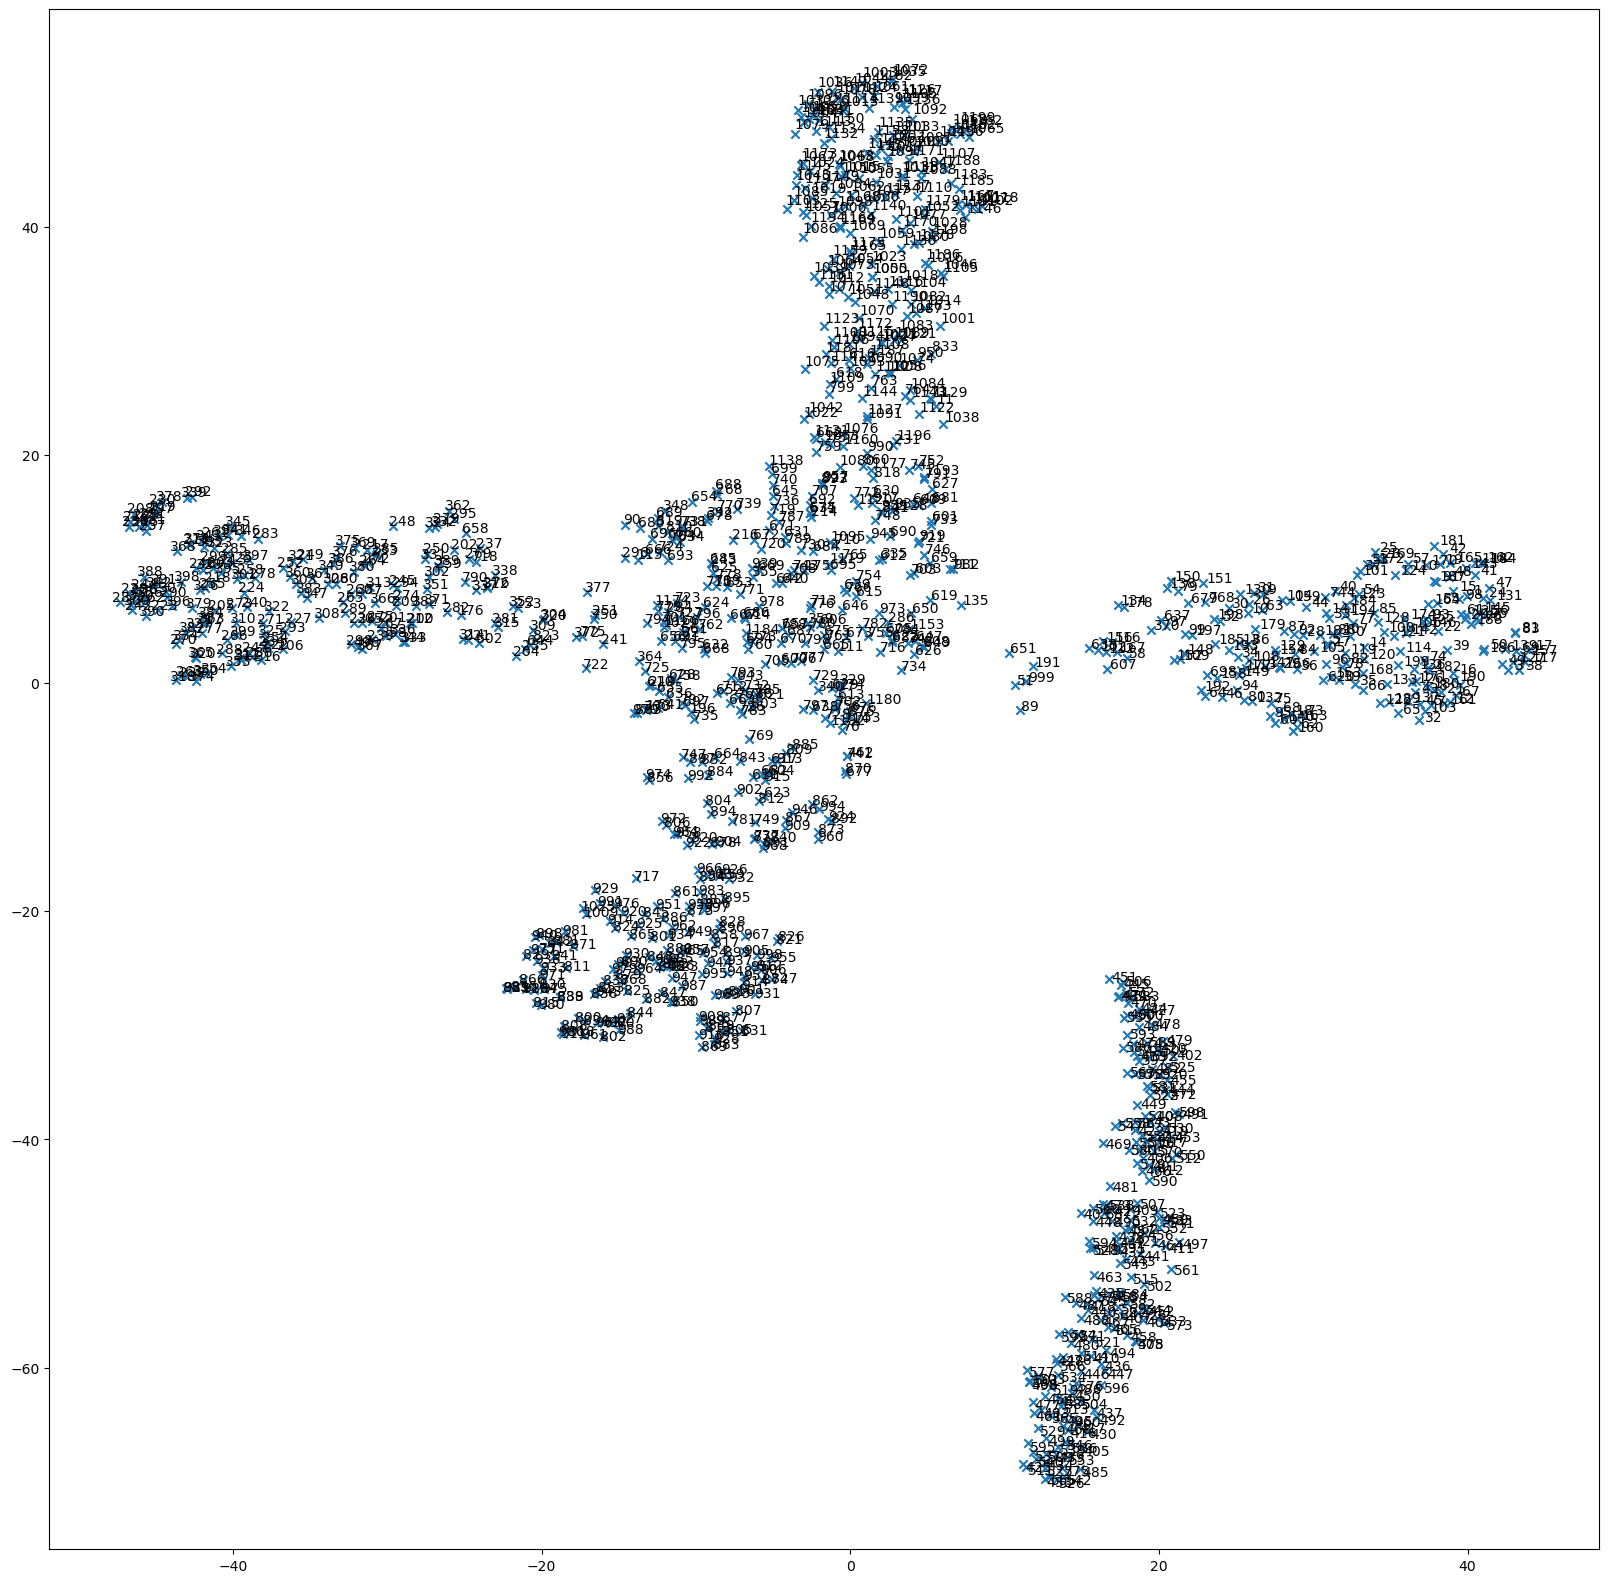

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data[:, 0], decomposition_data[:, 1], marker='x')
for i in range(len(decomposition_data)):
    plt.text(decomposition_data[:, 0][i] * 1.01, decomposition_data[:, 1][i] * 1.01, i, fontsize=10)
plt.show()